# Introduction

Let's import some libraries and the dataset:  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist

from time import time

In [ ]:
keras.utils.set_random_seed(42)
(x_train, y_train),(x_test, y_test)=mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


So we can see that we have 60 000 images 28x28 with one channel (they are gray images) in the training set and 10 000 in the test set. Let's see an example:

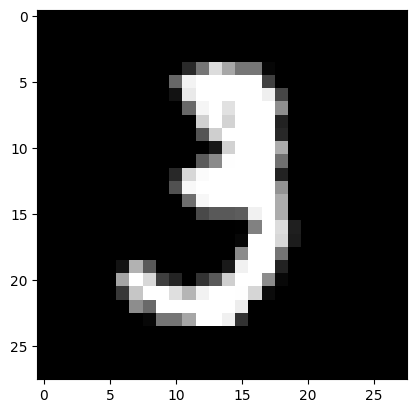

Example: 3


In [ ]:
plt.imshow(x_train[10], cmap='gray')
plt.show()
print(f"Example: {y_train[10]}")

To work better with the dataset let's normalize it and add a dimension to the arrays, that works as the number of channel:

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Let's also one-hot encode the output:

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Reference Model

Let's implement the model shown in class, so we can have a refernce to evaluate the next models:

##Definition

In [ ]:
input_shape = (28, 28, 1)
reference_model = Sequential()

reference_model.add(Input(shape=input_shape))
reference_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
reference_model.add(MaxPooling2D(pool_size=(2, 2)))
reference_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
reference_model.add(MaxPooling2D(pool_size=(2, 2)))
reference_model.add(Flatten())
reference_model.add(Dropout(0.5))
reference_model.add(Dense(num_classes, activation='softmax'))

reference_model.summary()

batch_size = 128
epochs = 15

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

##Training and Validation

In [ ]:
reference_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
reference_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
time_reference = time() - start

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.7538 - loss: 0.8070 - val_accuracy: 0.9710 - val_loss: 0.0997
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 107ms/step - accuracy: 0.9615 - loss: 0.1270 - val_accuracy: 0.9803 - val_loss: 0.0691
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9711 - loss: 0.0918 - val_accuracy: 0.9836 - val_loss: 0.0588
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9758 - loss: 0.0761 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9802 - loss: 0.0648 - val_accuracy: 0.9861 - val_loss: 0.0475
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9804 - loss: 0.0634 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9820 - loss: 0.0554 - val_accuracy: 0.9888 - val_loss: 0.0414
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9849 - loss: 0

In [ ]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

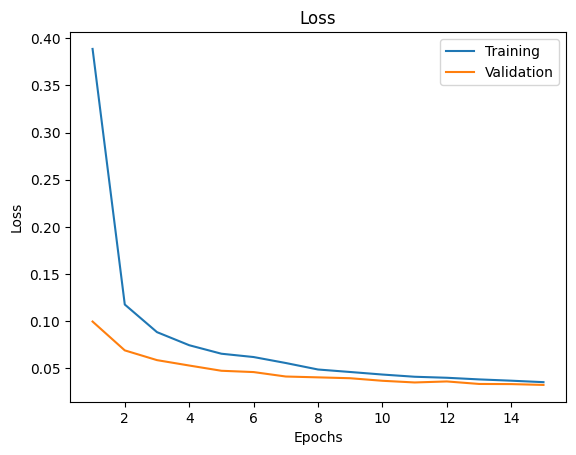

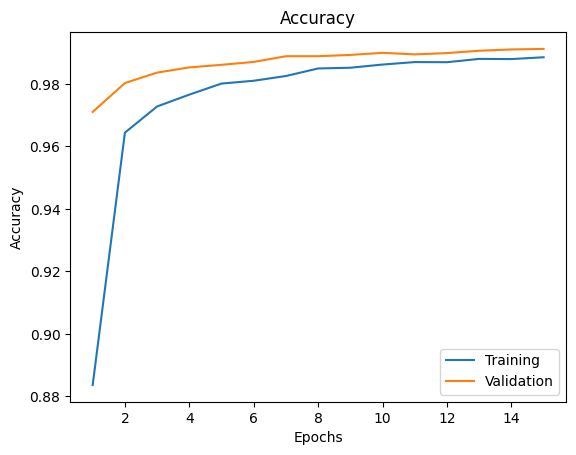

In [ ]:
plot_loss(reference_model.history)
plot_accuracy(reference_model.history)

##Test

In [ ]:
score_reference = reference_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_reference[0])
print('Test accuracy:', score_reference[1])

Test loss: 0.025733623653650284
Test accuracy: 0.9914000034332275


#First Model

Let's now try to implement a first model with less than 7000 thousend parameters. We try to reduce the number of parameters by reducing the number of filters in the convolutional layers. After some tests, I set the probability value of the dropouts to 0.2: with 0.5 the model was going in underfitting, resulting on a discrepancy between the value of the training and the validation accuracy, but without the dropout procedure it was clearly overfitting

##Definition

In [ ]:
first_model = Sequential()

first_model.add(Input(shape=input_shape))
first_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
first_model.add(Dropout(0.2))
first_model.add(Dense(num_classes, activation='softmax'))

first_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,490 (25.35 KB)

 Trainable params: 6,490 (25.35 KB)

 Non-trainable params: 0 (0.00 B)

##Training and Validation

In [ ]:
first_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
first_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
time_first = time() - start

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6518 - loss: 1.1043 - val_accuracy: 0.9598 - val_loss: 0.1481
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9442 - loss: 0.1797 - val_accuracy: 0.9703 - val_loss: 0.1034
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9614 - loss: 0.1280 - val_accuracy: 0.9759 - val_loss: 0.0843
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9667 - loss: 0.1068 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9700 - loss: 0.0935 - val_accuracy: 0.9806 - val_loss: 0.0693
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9748 - loss: 0.0848 - val_accuracy: 0.9814 - val_loss: 0.0641
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9750 - loss: 0.0795 - val_accuracy: 0.9832 - val_loss: 0.0597
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9769 - loss: 0.0729 - 

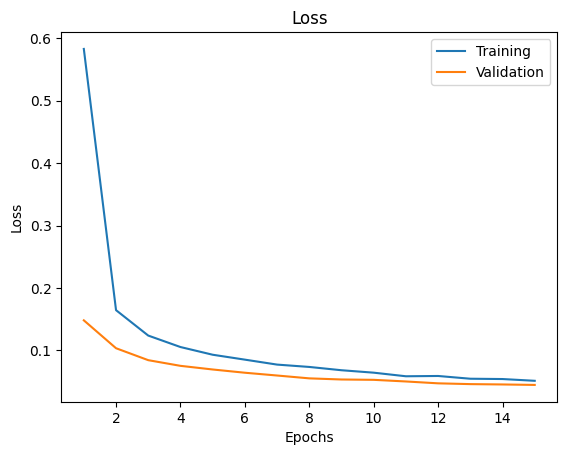

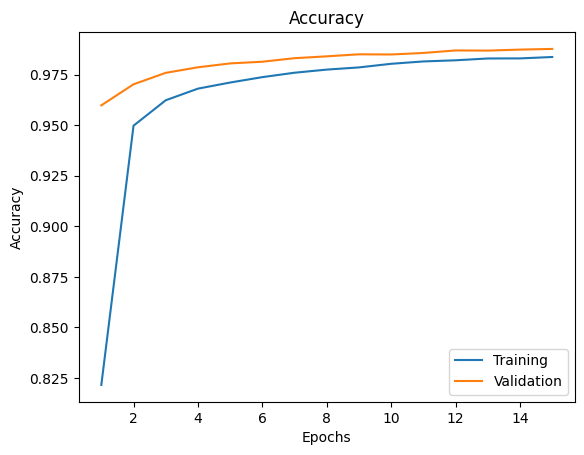

In [ ]:
plot_loss(first_model.history)
plot_accuracy(first_model.history)

##Test

In [ ]:
score_first = first_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_first[0])
print('Test accuracy:', score_first[1])

Test loss: 0.036640431731939316
Test accuracy: 0.9876999855041504


We can see that in this way we are obtaining a decent accuracy with less than 7000 parameters

# Second model

Here we try to modify the "strides" parameter of the max pooling, that is the size of the steps taken by the window of the pooling phase, so we obtain, also with a grater number of filter, e more light network

##Definition

In [ ]:
second_model = Sequential()

second_model.add(Input(shape=input_shape))
second_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
second_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
second_model.add(Conv2D(29, kernel_size=(3,3), activation='relu'))
second_model.add(MaxPooling2D(pool_size=(2, 2), strides = 4))
second_model.add(Flatten())
second_model.add(Dropout(0.2))
second_model.add(Dense(num_classes, activation='softmax'))

second_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 29)          │           4,205 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 29)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 261)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 261)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,985 (27.29 KB)

 Trainable params: 6,985 (27.29 KB)

 Non-trainable params: 0 (0.00 B)

##Training and Validation

In [ ]:
second_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
second_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
time_second = time() - start

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6189 - loss: 1.2169 - val_accuracy: 0.9458 - val_loss: 0.1980
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9218 - loss: 0.2507 - val_accuracy: 0.9620 - val_loss: 0.1349
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9422 - loss: 0.1847 - val_accuracy: 0.9690 - val_loss: 0.1087
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9551 - loss: 0.1468 - val_accuracy: 0.9738 - val_loss: 0.0967
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9584 - loss: 0.1282 - val_accuracy: 0.9770 - val_loss: 0.0849
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9632 - loss: 0.1176 - val_accuracy: 0.9780 - val_loss: 0.0804
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9665 - loss: 0.1060 - val_accuracy: 0.9798 - val_loss: 0.0742
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9683 - loss: 0.1009 - 

##Test

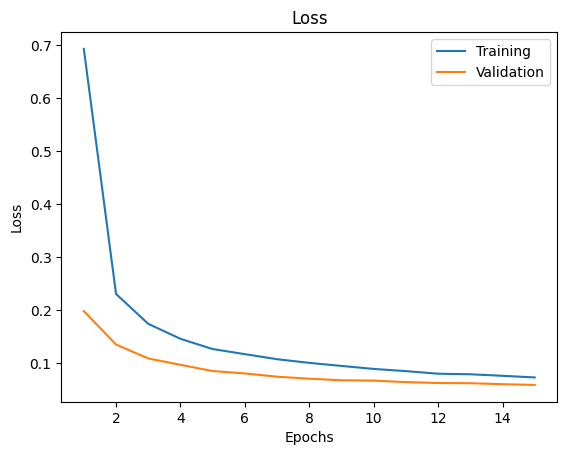

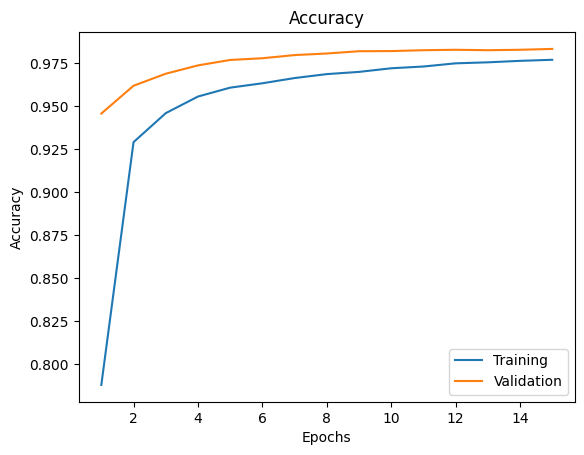

In [ ]:
plot_loss(second_model.history)
plot_accuracy(second_model.history)

In [ ]:
score_second = second_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_second[0])
print('Test accuracy:', score_second[1])

Test loss: 0.050342194736003876
Test accuracy: 0.9828000068664551


# Third Model
In this model we try to add a convolutional layer, but to obtain a model with less than 7000 paramters we need to reduce the number of filters in each layer:

##Definition

In [ ]:
third_model = Sequential()

third_model.add(Input(shape=input_shape))
third_model.add(Conv2D(8, kernel_size=(3,3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))
third_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
third_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))
third_model.add(Flatten())
third_model.add(Dropout(0.2))
third_model.add(Dense(num_classes, activation='softmax'))

third_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 3, 3, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,218 (24.29 KB)

 Trainable params: 6,218 (24.29 KB)

 Non-trainable params: 0 (0.00 B)

##Training and Validation

In [ ]:
third_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

start = time()
third_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
time_third = time() - start

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.5446 - loss: 1.4115 - val_accuracy: 0.9252 - val_loss: 0.2732
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8851 - loss: 0.3753 - val_accuracy: 0.9496 - val_loss: 0.1802
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9181 - loss: 0.2692 - val_accuracy: 0.9592 - val_loss: 0.1403
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9298 - loss: 0.2300 - val_accuracy: 0.9628 - val_loss: 0.1273
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9390 - loss: 0.1991 - val_accuracy: 0.9653 - val_loss: 0.1171
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9414 - loss: 0.1828 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9478 - loss: 0.1694 - val_accuracy: 0.9688 - val_loss: 0.1051
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9497 - loss: 0.1615 - 

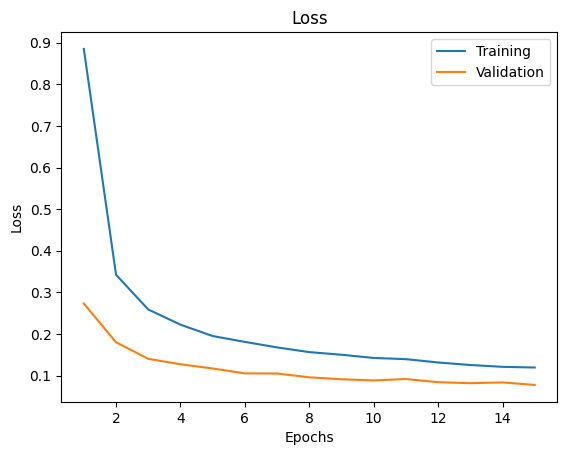

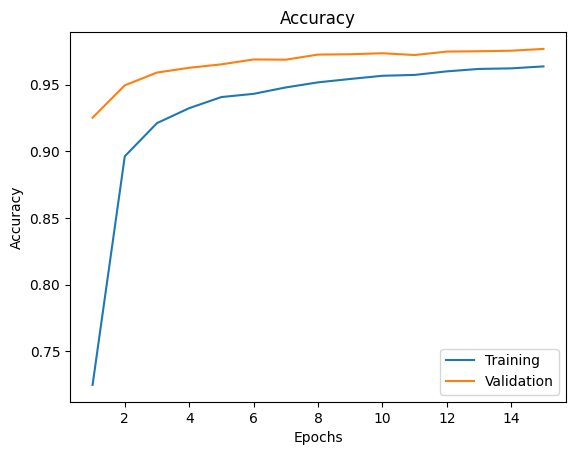

In [ ]:
plot_loss(third_model.history)
plot_accuracy(third_model.history)

##Test

In [ ]:
score_third = third_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_third[0])
print('Test accuracy:', score_third[1])

Test loss: 0.07714401185512543
Test accuracy: 0.9778000116348267


We can see that the best model still remains the first, without surprise, but all other three models obtain a good value of accuracy on the test set, with the second model that win on the others two.

#Fourth Model
We now try to add a dense layer at the end of the network. Because the dense layer add a lot of parameter, we have to reduce the number of filters and the convolutional layers in the first part of the network to obtain a network with less than 7000 parameters


##Definition

In [ ]:
fourth_model = Sequential()

fourth_model.add(Input(shape=input_shape))

fourth_model.add(Conv2D(10, kernel_size=(3,3), activation='relu'))
fourth_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

fourth_model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
fourth_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

fourth_model.add(Flatten())
fourth_model.add(Dropout(0.2))

fourth_model.add(Dense(13, activation='relu'))
fourth_model.add(Dense(num_classes, activation='softmax'))

fourth_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 16)          │           1,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 13)                  │           5,213 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,909 (26.99 KB)

 Trainable params: 6,909 (26.99 KB)

 Non-trainable params: 0 (0.00 B)

##Training and Validation

In [ ]:
fourth_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

start = time()
fourth_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
time_fourth = time() - start

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.5212 - loss: 1.4418 - val_accuracy: 0.9452 - val_loss: 0.2151
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9252 - loss: 0.2571 - val_accuracy: 0.9631 - val_loss: 0.1326
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9497 - loss: 0.1678 - val_accuracy: 0.9702 - val_loss: 0.1040
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9585 - loss: 0.1375 - val_accuracy: 0.9743 - val_loss: 0.0915
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9631 - loss: 0.1152 - val_accuracy: 0.9780 - val_loss: 0.0798
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9674 - loss: 0.1042 - val_accuracy: 0.9800 - val_loss: 0.0722
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9713 - loss: 0.0945 - val_accuracy: 0.9799 - val_loss: 0.0707
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9722 - loss: 0.0875 - 

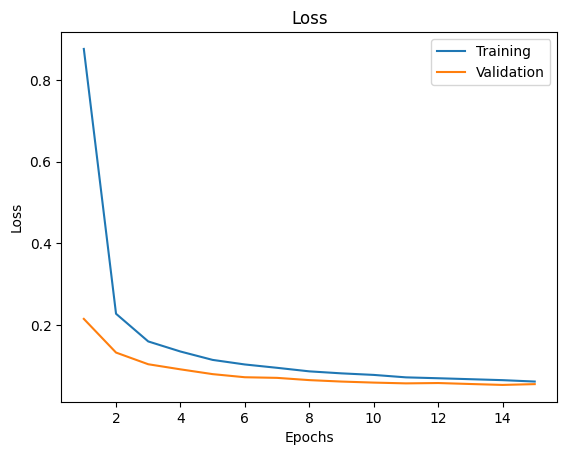

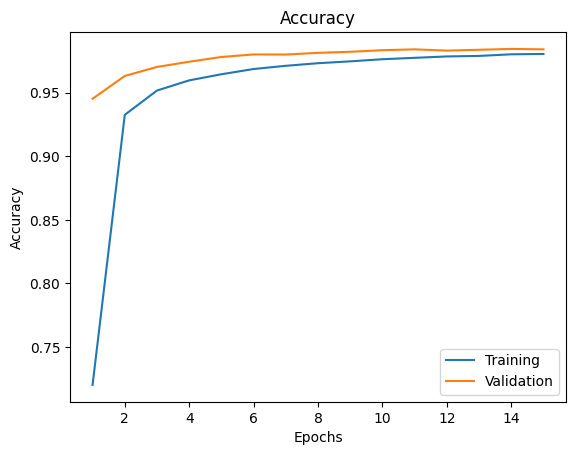

In [ ]:
plot_loss(fourth_model.history)
plot_accuracy(fourth_model.history)

##Test

In [ ]:
score_fourth = fourth_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_fourth[0])
print('Test accuracy:', score_fourth[1])

Test loss: 0.04940130189061165
Test accuracy: 0.9857000112533569


#Comparison

In [ ]:
score_reference = reference_model.evaluate(x_test, y_test, verbose=0)
score_first = first_model.evaluate(x_test, y_test, verbose=0)
score_second = second_model.evaluate(x_test, y_test, verbose=0)
score_third = third_model.evaluate(x_test, y_test, verbose=0)
score_fourth = fourth_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
acc_reference = round(score_reference[1],6)
acc_first = round(score_first[1],6)
acc_second = round(score_second[1],6)
acc_third = round(score_third[1],6)
acc_fourth = round(score_fourth[1],6)

print(f"Accuracy of the reference model: {acc_reference}")
print(f"Accuracy of the first model: {acc_first}")
print(f"Accuracy of the second model: {acc_second}")
print(f"Accuracy of the third model: {acc_third}")

Accuracy of the reference model: 0.9914
Accuracy of the first model: 0.9877
Accuracy of the second model: 0.9828
Accuracy of the third model: 0.9778


Let's now generate a plot showing accuracy on y axis and training time on x axis:

In [ ]:
param_reference = reference_model.count_params()
param_first = first_model.count_params()
param_second = second_model.count_params()
param_third = third_model.count_params()
param_fourth = fourth_model.count_params()

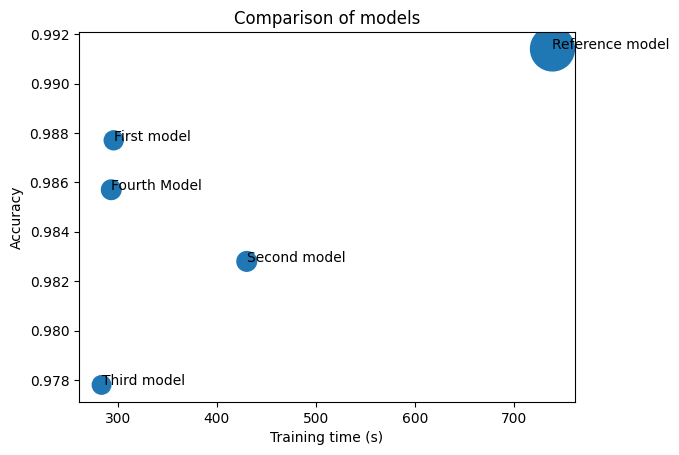

In [ ]:
acc_list = [acc_reference, acc_first, acc_second, acc_third, acc_fourth]
time_list = [time_reference, time_first, time_second, time_third, time_fourth]
params_list = [param_reference, param_first, param_second, param_third, param_fourth]

norm_params_list = [int(float(p)/max(params_list)*1000) for p in params_list]

labels = ['Reference model', 'First model', 'Second model', 'Third model', 'Fourth Model']

fig, ax  = plt.subplots()
ax.scatter(time_list, acc_list, s=norm_params_list)
for i, label in enumerate(labels):
  ax.annotate(label, (time_list[i], acc_list[i]))

plt.ylabel('Accuracy')
plt.xlabel('Training time (s)')
plt.title('Comparison of models')
plt.show()

**Conclusion**: We can crearly see that althouth the "referencemodel is still the best in terms of accuracy, the "first_model" is a nice tradeoff between accuracy and training time, followed by the "fouth_model" that also reaches a nice value of accuracy in in a short time